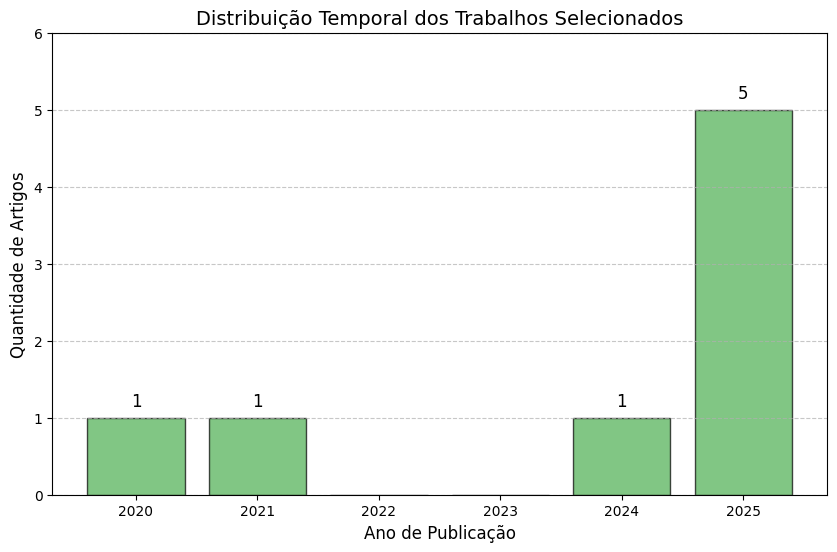

In [6]:
import matplotlib.pyplot as plt

# Ajustado: 6 anos e 6 valores correspondentes
anos = ['2020', '2021', '2022', '2023', '2024', '2025']
# Exemplo baseado no seu comentário: Coenraad(20)=1, Horcher(21)=1, Pacheco(24)=1, Resto(25)=5
quantidades = [1, 1, 0, 0, 1, 5] 

plt.figure(figsize=(10, 6))
bars = plt.bar(anos, quantidades, color='#4CAF50', alpha=0.7, edgecolor='black')

# Adicionando valores no topo
for bar in bars:
    yval = bar.get_height()
    if yval > 0:
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), 
                 ha='center', va='bottom', fontsize=12)

plt.title('Distribuição Temporal dos Trabalhos Selecionados', fontsize=14)
plt.ylabel('Quantidade de Artigos', fontsize=12)
plt.xlabel('Ano de Publicação', fontsize=12)
plt.ylim(0, max(quantidades) + 1) # Ajuste para o texto não cortar no topo
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

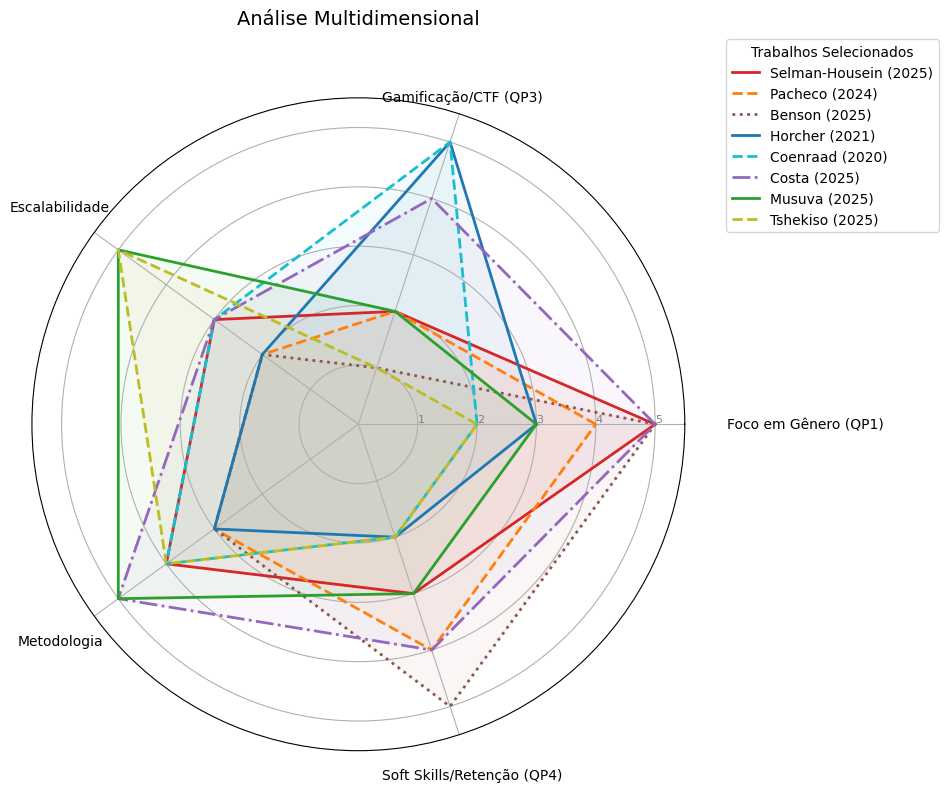

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# 1. Definição das Categorias
categorias = [
    'Foco em Gênero (QP1)',  
    'Gamificação/CTF (QP3)',  
    'Escalabilidade',  
    'Metodologia',  
    'Soft Skills/Retenção (QP4)'
]
N = len(categorias)

# 2. Dados
artigos_data = {
    'Selman-Housein (2025)': [5, 2, 3, 4, 3], 
    'Pacheco (2024)':        [4, 2, 2, 3, 4],
    'Benson (2025)':         [5, 1, 2, 3, 5],
    'Horcher (2021)':        [3, 5, 2, 3, 2],
    'Coenraad (2020)':       [2, 5, 3, 4, 2],
    'Costa (2025)':          [5, 4, 3, 5, 4],
    'Musuva (2025)':         [3, 2, 5, 5, 3],
    'Tshekiso (2025)':       [2, 1, 5, 4, 2],
}

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

def plot_radar(label, color, linestyle='solid'):
    values = artigos_data[label]
    values_closed = values + values[:1]
    ax.plot(angles, values_closed, linewidth=2, linestyle=linestyle, label=label, color=color)
    ax.fill(angles, values_closed, color=color, alpha=0.05)

# 4. Plotagem
plot_radar('Selman-Housein (2025)', '#d62728', '-') 
plot_radar('Pacheco (2024)', '#ff7f0e', '--')
plot_radar('Benson (2025)', '#8c564b', ':')
plot_radar('Horcher (2021)', '#1f77b4', '-')
plot_radar('Coenraad (2020)', '#17becf', '--')
plot_radar('Costa (2025)', '#9467bd', '-.')
plot_radar('Musuva (2025)', '#2ca02c', '-')
plot_radar('Tshekiso (2025)', '#bcbd22', '--')

# 5. Ajustes Visuais Finos nas Rótulos (Labels)
# O parâmetro 'labelpad' afasta o texto do gráfico
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categorias, size=10)

# Ajuste manual de cada label para evitar sobreposição
# labels[0] = Gênero, labels[1] = Gamificação, etc.
labels = ax.get_xticklabels()
labels[0].set_horizontalalignment('left')   # Empurra 'Gênero' para a direita
labels[1].set_verticalalignment('bottom')   # Sobe 'Gamificação'
labels[1].set_position((0, 0.1))            # Ajuste fino de posição vertical

ax.tick_params(axis='x', pad=20) # Aumenta o espaçamento geral de todos os textos

ax.set_rlabel_position(0)
plt.yticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"], color="grey", size=8)
plt.ylim(0, 5.5)

plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.1), title="Trabalhos Selecionados")
plt.title('Análise Multidimensional', fontsize=14, y=1.1)

plt.tight_layout()
plt.show()

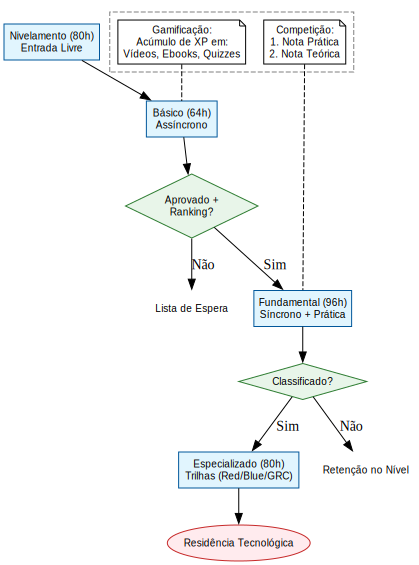

In [3]:
import os
# O caminho abaixo é o padrão, verifique se no seu PC é este mesmo:
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

from graphviz import Digraph
# ... resto do código ...

# Criação do objeto do diagrama
dot = Digraph(comment='Fluxograma Hackers do Bem', format='png')
dot.attr(rankdir='TB', size='8,10')

# Estilização Global
dot.attr('node', fontname='Arial', fontsize='10')

# Definição dos Blocos (Níveis)
dot.node('NIV', 'Nivelamento (80h)\nEntrada Livre', shape='box', style='filled', fillcolor='#e1f5fe', color='#01579b')
dot.node('BAS', 'Básico (64h)\nAssíncrono', shape='box', style='filled', fillcolor='#e1f5fe', color='#01579b')
dot.node('FUN', 'Fundamental (96h)\nSíncrono + Prática', shape='box', style='filled', fillcolor='#e1f5fe', color='#01579b')
dot.node('ESP', 'Especializado (80h)\nTrilhas (Red/Blue/GRC)', shape='box', style='filled', fillcolor='#e1f5fe', color='#01579b')

# Definição das Decisões (Losangos)
dot.node('DEC1', 'Aprovado +\nRanking?', shape='diamond', style='filled', fillcolor='#e8f5e9', color='#2e7d32')
dot.node('DEC2', 'Classificado?', shape='diamond', style='filled', fillcolor='#e8f5e9', color='#2e7d32')

# Saída Final (Elipse)
dot.node('RES', 'Residência Tecnológica', shape='ellipse', style='filled', fillcolor='#ffebee', color='#c62828')

# Nós Auxiliares (Saídas Negativas)
dot.node('WAIT', 'Lista de Espera', shape='plaintext')
dot.node('RETER', 'Retenção no Nível', shape='plaintext')

# Conexões Principais
dot.edge('NIV', 'BAS')
dot.edge('BAS', 'DEC1')
dot.edge('DEC1', 'FUN', label='Sim')
dot.edge('DEC1', 'WAIT', label='Não')
dot.edge('FUN', 'DEC2')
dot.edge('DEC2', 'ESP', label='Sim')
dot.edge('DEC2', 'RETER', label='Não')
dot.edge('ESP', 'RES')

# Notas de Gamificação/XP (estilo diferente)
with dot.subgraph(name='cluster_xp') as c:
    c.attr(style='dashed', color='gray')
    c.node('XP1', 'Gamificação:\nAcúmulo de XP em:\nVídeos, Ebooks, Quizzes', shape='note')
    c.node('XP2', 'Competição:\n1. Nota Prática\n2. Nota Teórica', shape='note')

# Conectando as notas aos níveis correspondentes
dot.edge('XP1', 'BAS', style='dashed', arrowhead='none')
dot.edge('XP2', 'FUN', style='dashed', arrowhead='none')

# Exibir no Jupyter
dot